In [1]:
import pandas as pd

# Загрузка данных
data = {
    'dt': ['2022-09-05', '2022-09-12', '2022-09-19', '2022-09-26', '2022-10-03', '2022-10-10', '2022-10-17', '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14', '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12', '2022-12-19', '2022-12-26', '2023-01-02', '2023-01-09', '2023-01-16', '2023-01-23', '2023-01-30', '2023-02-06', '2023-02-13', '2023-02-20', '2023-02-27', '2023-03-06', '2023-03-13'],
    'Цена на арматуру': [46000, 46000, 46000, 45500, 45500, 45000, 44000, 43000, 42000, 41500, 41000, 40000, 40000, 40500, 41700, 41700, 42500, 42700, 42700, 42700, 42800, 42800, 44500, 44500, 46000, 49200, 53700, 55500]
}

df = pd.DataFrame(data)
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)

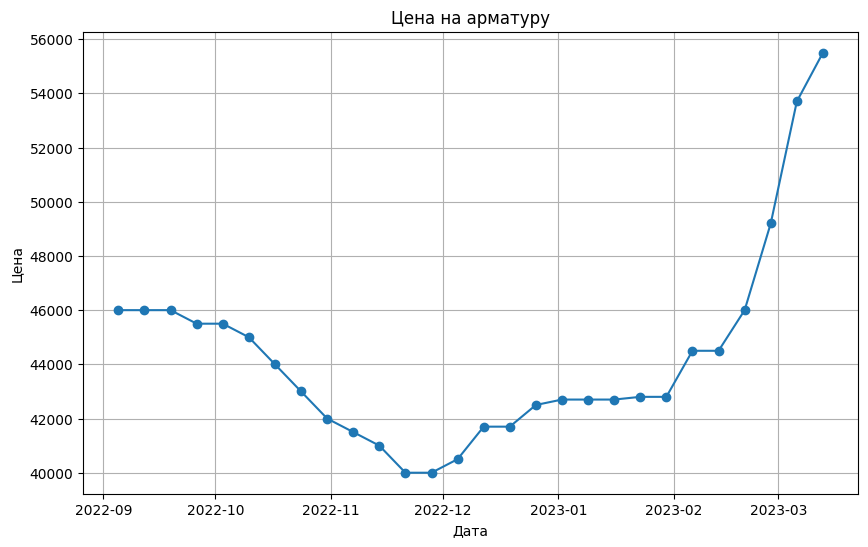

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Цена на арматуру'], marker='o')
plt.title('Цена на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

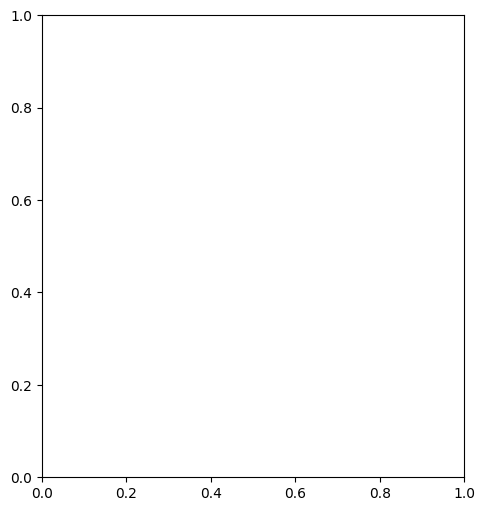

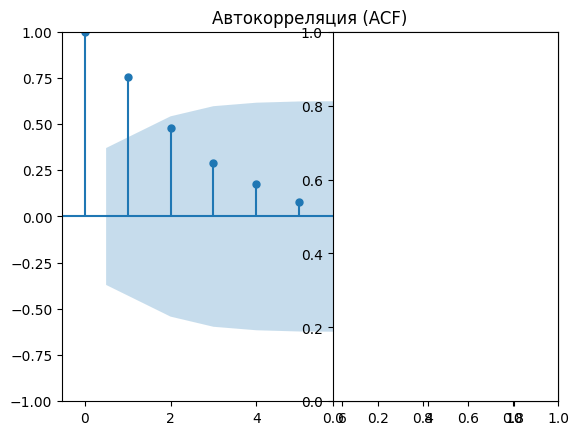

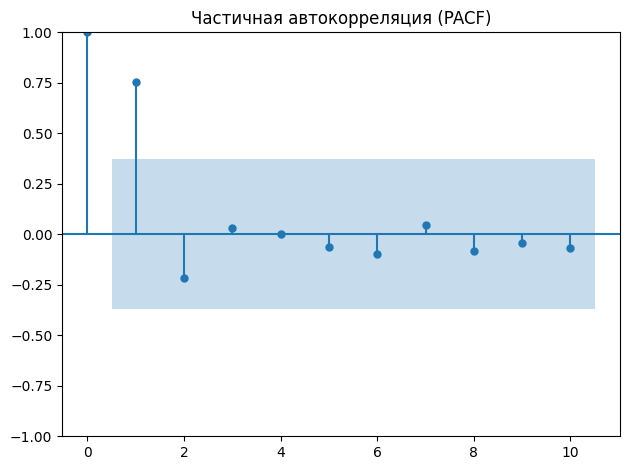

In [4]:
from matplotlib.pyplot import plot_date
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.DataFrame(data)
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)

# Построение ACF и PACF с корректным количеством лагов
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(df['Цена на арматуру'], lags=10)  # Устанавливаем lags < 14
plt.title('Автокорреляция (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(df['Цена на арматуру'], lags=10)  # Устанавливаем lags < 14
plt.title('Частичная автокорреляция (PACF)')

plt.tight_layout()
plt.show()

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Пример параметров, которые могут быть выбраны на основе ACF и PACF
model = SARIMAX(df['Цена на арматуру'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

print(model_fit.summary())

c:\Users\VikA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\VikA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\VikA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\VikA\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA 

                                     SARIMAX Results                                      
Dep. Variable:                   Цена на арматуру   No. Observations:                   28
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -131.637
Date:                            Wed, 19 Mar 2025   AIC                            273.273
Time:                                    21:44:37   BIC                            276.814
Sample:                                09-05-2022   HQIC                           273.236
                                     - 03-13-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9996      2.474     -0.404      0.686      -5.848       3.849
ma.L1          0.9998      2.978   

In [6]:
forecast = model_fit.forecast(steps=12)
print(forecast)

2023-03-20    56299.466731
2023-03-27    56497.105299
2023-04-03    56495.215581
2023-04-10    56491.860012
2023-04-17    56589.811410
2023-04-24    56587.767722
2023-05-01    58284.496269
2023-05-08    58281.141726
2023-05-15    59714.921247
2023-05-22    62910.711319
2023-05-29    67408.122386
2023-06-05    69205.854708
Freq: W-MON, Name: predicted_mean, dtype: float64


In [7]:
from sklearn.metrics import mean_squared_error

# Пример оценки на тестовых данных
mse = mean_squared_error(df['Цена на арматуру'], model_fit.fittedvalues)
print(f'MSE: {mse}')

MSE: 118808735.25992277
